In [116]:
import pandas as pd
import numpy as np
import os
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

path = '/Users/ali.khan/Documents/src/qcm-analysis'

In [5]:
morph = pd.read_csv('./resources/quran-morphology-final.csv')

In [28]:
#CREATE AYAAT FILE

analysand = 'Lemma' #Lemma_ar 'FORM_ar'
ayaat = []
morph[analysand] = morph[analysand].fillna('')
for g,v in morph[['sura','aya','word',analysand]].groupby(['sura','aya','word']):
    ayaat.append([*v.sura.unique(),*v.aya.unique(),''.join(v[analysand])])
ayaat = pd.DataFrame(ayaat,columns=['sura','aya','word'])
ayaat1 = []
for g,v in ayaat.groupby(['sura','aya']):
    ayaat1.append([*v.sura.unique(),*v.aya.unique(),' '.join(v.word)])
ayaat = pd.DataFrame(ayaat1,columns=['sura','aya','text'])
ayaat.to_csv('./data/all-ayaat-{}.csv'.format(analysand))

In [16]:
ayalemma = pd.read_csv(path + os.path.sep + 'data' + os.path.sep + 'all-ayaat-{}.csv'.format(analysand),
                       index_col=0)
ayalemma

,sura,aya,text
0,1,1,{som {ll~ah r~aHoma`n r~aHiym
1,1,2,Hamod {ll~ah rab~ Ea`lamiyn
2,1,3,r~aHoma`n r~aHiym
3,1,4,ma`lik yawom diyn
4,1,5,<iy~aA Eabada <iy~aA {sotaEiynu
...,...,...,...
6231,114,2,malik n~aAs
6232,114,3,<ila`h n~aAs
6233,114,4,min $ar~ wasowaAs xan~aAs
6234,114,5,{l~a*iY wasowasa fiY Sador n~aAs


In [17]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [18]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    print(vectors)
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [19]:
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import TfidfVectorizer
X_test = [ayalemma.iloc[5171].text, ayalemma.iloc[1267].text]
stopword = [u' '] 

patt = r"(?u)[a-zA-Z0-9$&+`%\"\',:;=?@#|\{}<>~.^*()%!-_!]+"

tfidf = TfidfVectorizer(token_pattern=patt,stop_words=stopword,lowercase=False,strip_accents='unicode')
weight = tfidf.fit_transform (X_test).toarray() 
vocab = tfidf.get_feature_names ()
idf = tfidf.idf_ 

cosine_similarity(weight)[1][0]

1.0

In [20]:
weight = tfidf.fit_transform (ayalemma.text.fillna('').values.tolist()).toarray ()
vocab = tfidf.get_feature_names ()
idf = tfidf.idf_
#print(vocab)
print(weight)
print(tfidf.idf_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8.12881666 7.94649511 4.41037841 ... 7.54103    9.0451074  9.0451074 ]


In [21]:
err = set(vocab)-set(morph.Lemma.fillna('').unique().tolist())
missing = set(morph.Lemma.fillna('').unique().tolist())-set(vocab)
print('Lemmas in Morphology',len(morph.Lemma.fillna('').unique().tolist()))
print('Vocab',len(vocab))
print('Errors in Vocab',len(err))
print('Missing in Vocab',len(missing))
set(morph.Lemma.fillna('').unique().tolist()) & err
missing
#morph[morph.Lemma.fillna('').str.contains('kul~amaAmaA')]

Lemmas in Morphology 4818
Vocab 4839
Errors in Vocab 23
Missing in Vocab 2


{'', 'r~ub'}

In [22]:
test = pd.DataFrame(weight)
testcos = pd.DataFrame(cosine_similarity(test,test))
test

,0,1,2,3,4,5,6,7,8,9,...,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


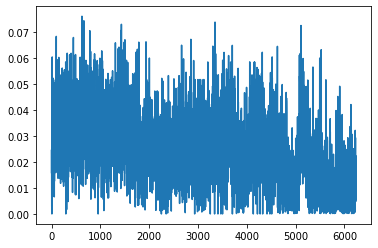

In [23]:
testcos.mean().plot()

In [24]:
s = testcos.unstack()
so = s.sort_values(kind="quicksort")
sos = pd.DataFrame(so[so != 0]).reset_index()
sos = sos[sos.level_0 != sos.level_1]
sos

,level_0,level_1,0
0,2821,2686,0.001751
1,2686,2821,0.001751
2,239,499,0.001918
3,499,239,0.001918
4,99,2851,0.001997
...,...,...,...
17539262,2703,2714,1.000000
17539420,754,678,1.000000
17539432,1031,1044,1.000000
17539433,1044,1031,1.000000


In [25]:
sos['sorted_row'] = [sorted([a,b]) for a,b in zip(sos.level_0, sos.level_1)]
sos['sorted_row'] = sos['sorted_row'].astype(str)
sos.drop_duplicates(subset=['sorted_row'], inplace=True)
sos

,level_0,level_1,0,sorted_row
0,2821,2686,0.001751,"[2686, 2821]"
2,239,499,0.001918,"[239, 499]"
4,99,2851,0.001997,"[99, 2851]"
6,398,2851,0.002000,"[398, 2851]"
8,499,2825,0.002002,"[499, 2825]"
...,...,...,...,...
17539011,3056,3038,1.000000,"[3038, 3056]"
17539032,3040,3058,1.000000,"[3040, 3058]"
17539254,2714,2703,1.000000,"[2703, 2714]"
17539420,754,678,1.000000,"[678, 754]"


In [26]:
sos.columns = ['index','aya2','cosine_similarity','temp']
sos = sos.drop('temp',1)
sos

/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,index,aya2,cosine_similarity
0,2821,2686,0.001751
2,239,499,0.001918
4,99,2851,0.001997
6,398,2851,0.002000
8,499,2825,0.002002
...,...,...,...
17539011,3056,3038,1.000000
17539032,3040,3058,1.000000
17539254,2714,2703,1.000000
17539420,754,678,1.000000


In [29]:
ayaat = pd.read_csv(path + os.path.sep + 'data' + os.path.sep + 'all-ayaat-FORM_ar.csv', index_col=0)
ayaat

,sura,aya,text
0,1,1,بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ
1,1,2,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ
2,1,3,ٱلرَّحْمَٰنِ ٱلرَّحِيمِ
3,1,4,مَٰلِكِ يَوْمِ ٱلدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6231,114,2,مَلِكِ ٱلنَّاسِ
6232,114,3,إِلَٰهِ ٱلنَّاسِ
6233,114,4,مِن شَرِّ ٱلْوَسْوَاسِ ٱلْخَنَّاسِ
6234,114,5,ٱلَّذِى يُوَسْوِسُ فِى صُدُورِ ٱلنَّاسِ


In [30]:
ayaat['numwordsaya'] = ayaat['text'].apply(lambda x: len(x.split(' ')))
ayaat.numwordsaya.mean()

12.41661321359846

In [402]:
threshold = .95

In [405]:
df = sos[sos.cosine_similarity>=0.5].merge(ayaat.reset_index(),on='index',how='left') \
    .rename(columns={'text':'textaya1'}) \
    .merge(ayalemma,on=['sura','aya'],how='left') \
    .rename(columns={'text':'lemmaaya1'}) \
    .rename(columns={'index':'aya1ix','aya2':'index','sura':'sura1','aya':'aya1'}) \
    .merge(ayaat.reset_index(),on='index',how='left') \
    .rename(columns={'text':'textaya2'}) \
    .merge(ayalemma,on=['sura','aya'],how='left') \
    .rename(columns={'text':'lemmaaya2'}) \
    .rename(columns={'index':'aya2ix','sura':'sura2','aya':'aya2'})
df
if False:
    df.sort_values('cosine_similarity',ascending=False) \
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_all_ayaat+0.5.csv')
if False:
    df[df.cosine_similarity>=1].sort_values('aya1ix',ascending=True) \
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_all_ayaat+1.csv')
if False:
    df=df.dropna()
    for col in ['sura1', 'aya1', 'numwordsaya_x', 'sura2', 'aya2', 'numwordsaya_y']:
        df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 3901
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aya1ix             3902 non-null   int64  
 1   aya2ix             3902 non-null   int64  
 2   cosine_similarity  3902 non-null   float64
 3   sura1              3902 non-null   int64  
 4   aya1               3902 non-null   int64  
 5   textaya1           3902 non-null   object 
 6   numwordsaya_x      3902 non-null   int64  
 7   lemmaaya1          3902 non-null   object 
 8   sura2              3902 non-null   int64  
 9   aya2               3902 non-null   int64  
 10  textaya2           3902 non-null   object 
 11  numwordsaya_y      3902 non-null   int64  
 12  lemmaaya2          3902 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 426.8+ KB


In [406]:
unique_identical = set(df[df.cosine_similarity>=threshold]['lemmaaya1'].unique().tolist()) \
                        .union(set(df[df.cosine_similarity>=threshold]['lemmaaya2'].unique().tolist()))
unique_identical = pd.DataFrame(unique_identical)
len(unique_identical)
#unique_identical.to_csv(path+os.path.sep+'data'+os.path.sep+'all_identical_120_ayaat.csv')

181

In [407]:
b = df[['aya1ix', 'aya2ix', 'cosine_similarity', 'sura1', 'aya1', 'sura2',
       'aya2', 'textaya1', 'textaya2', 'lemmaaya1', 'lemmaaya2']]

b = b[b.cosine_similarity>=threshold]#.drop('cosine_similarity',1)

b.cosine_similarity = b.cosine_similarity.round(2).astype(str)

b.lemmaaya1 = b.lemmaaya1.str.strip()
b.lemmaaya2 = b.lemmaaya2.str.strip()
if False:
    c = b[b.lemmaaya1!=b.lemmaaya2]
    b = b[b.lemmaaya1==b.lemmaaya2]
#b = b.drop('lemmaaya2',1)
b['aya1ix'] = b['aya1ix'].astype(str)
b['aya2ix'] = b['aya2ix'].astype(str)
b['ixpair'] = b['aya1ix']+','+b['aya2ix']

b['sa1'] = b[['sura1','aya1']].astype(str).agg(':'.join,axis=1)
b['sa2'] = b[['sura2','aya2']].astype(str).agg(':'.join,axis=1)
b['sapair'] = b['sa1']+','+b['sa2']
b = b.drop(['sa1','sa2'],1)
b = b.drop(['aya1ix','aya2ix'],1)

#c = b[b.lemmaaya2.isin(set(b.lemmaaya2.unique()) - set(b.lemmaaya1.unique()))]

b = b.groupby('lemmaaya1').agg('|'.join).reset_index()
#c = c.groupby('lemmaaya2').agg('|'.join).reset_index()

if False:
    b.sort_values(['textaya1','sura1','aya1','cosine_similarity'])\
        .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_1694_ayaat+'+str(threshold)+'_sapair.csv')
    
#b = b.append(c, ignore_index=True)#.drop('ixpair',1)
b['lemmaaya2'].loc[b[b.lemmaaya1 == b.lemmaaya2]['lemmaaya2'].index] = 'same as lemmaaya1'
b['textaya2'].loc[b[b.textaya1 == b.textaya2]['textaya2'].index] = 'same as textaya1'
b[b.textaya2.str.contains('same')]
b

/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,lemmaaya1,cosine_similarity,textaya1,textaya2,lemmaaya2,ixpair,sapair
0,*a`lik 'aAyap kita`b Hakiym,1.0,الٓر تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْحَكِيمِ,تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْحَكِيمِ,same as lemmaaya1,"1364,3470","10:1,31:2"
1,*a`lik 'aAyap kita`b m~ubiyn,1.0|1.0|1.0,تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْمُبِينِ|تِلْكَ ء...,تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْمُبِينِ|الٓر تِل...,*a`lik 'aAyap kita`b m~ubiyn|*a`lik 'aAyap kit...,"2933,3253|2933,1596|3253,1596","26:2,28:2|26:2,12:1|28:2,12:1"
2,*a`lik 'aAyap quro'aAn kita`b m~ubiyn,1.0,طسٓ تِلْكَ ءَايَٰتُ ٱلْقُرْءَانِ وَكِتَابٍ مُّ...,الٓر تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ وَقُرْءَانٍ مّ...,*a`lik 'aAyap kita`b quro'aAn m~ubiyn,"3159,1802","27:1,15:1"
3,*a`lik >an~ $aA^q~u {ll~ah rasuwl man $aA^q~u ...,0.98,ذَٰلِكَ بِأَنَّهُمْ شَآقُّوا۟ ٱللَّهَ وَرَسُو...,ذَٰلِكَ بِأَنَّهُمْ شَآقُّوا۟ ٱللَّهَ وَرَسُو...,*a`lik >an~ $aA^q~u {ll~ah rasuwl man $aA^q~u ...,"5129,1172","59:4,8:13"
4,*a`lik >an~ {ll~ah Haq~ >an~ maA daEaA min du...,1.0,ذَٰلِكَ بِأَنَّ ٱللَّهَ هُوَ ٱلْحَقُّ وَأَنَّ ...,ذَٰلِكَ بِأَنَّ ٱللَّهَ هُوَ ٱلْحَقُّ وَأَنَّ ...,*a`lik >an~ {ll~ah Haq~ >an~ maA daEaA min du...,"3498,2656","31:30,22:62"
...,...,...,...,...,...,...,...
145,{l~a*iY >arosala rasuwl hudFY diyn Haq~ >aZoha...,1.0,هُوَ ٱلَّذِىٓ أَرْسَلَ رَسُولَهُۥ بِٱلْهُدَىٰ ...,same as textaya1,same as lemmaaya1,"1267,5171","9:33,61:9"
146,{l~a*iY Sabara EalaY` rab~ tawak~alo,1.0,ٱلَّذِينَ صَبَرُوا۟ وَعَلَىٰ رَبِّهِمْ يَتَوَك...,same as textaya1,same as lemmaaya1,"1942,3398","16:42,29:59"
147,{l~a*iY Sad~a Ean sabiyl {ll~ah bagaY` Eiwaj ...,1.0,ٱلَّذِينَ يَصُدُّونَ عَن سَبِيلِ ٱللَّهِ وَيَب...,ٱلَّذِينَ يَصُدُّونَ عَن سَبِيلِ ٱللَّهِ وَيَب...,{l~a*iY Sad~a Ean sabiyl {ll~ah bagaY` Eiwaj ...,"998,1491","7:45,11:19"
148,{l~a*iY kafara ka*~aba 'aAyap >uwla`^}ik >aSoH...,1.0,وَٱلَّذِينَ كَفَرُوا۟ وَكَذَّبُوا۟ بِـَٔايَٰتِ...,same as textaya1,same as lemmaaya1,"754,678","5:86,5:10"


In [408]:
b['pair_count']=b['ixpair'].apply(lambda x: len(x.split('|')))
b = b.sort_values('pair_count',ascending=False)
b = b[['cosine_similarity','pair_count','sapair','textaya1','textaya2','ixpair','lemmaaya1','lemmaaya2']]
b

,cosine_similarity,pair_count,sapair,textaya1,textaya2,ixpair,lemmaaya1,lemmaaya2
42,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,465,"55:55,55:38|55:45,55:30|55:55,55:40|55:55,55:3...",فَبِأَىِّ ءَالَآءِ رَبِّكُمَا تُكَذِّبَانِ|فَ...,same as textaya1,"4955,4938|4945,4930|4955,4940|4955,4932|4947,4...",>aY~ 'aAlaA^' rab~ ka*~aba,>aY~ 'aAlaA^' rab~ ka*~aba|>aY~ 'aAlaA^' rab~ ...
136,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,66,"77:49,77:45|77:49,77:47|77:49,83:10|77:49,77:4...",وَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ|وَيْلٌ يَو...,وَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ|وَيْلٌ يَو...,"5670,5666|5670,5668|5670,5857|5670,5661|5670,5...",wayol yawoma}i* m~uka*~ibiyn,wayol yawoma}i* m~uka*~ibiyn|wayol yawoma}i* m...
149,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,28,"26:108,26:110|26:110,26:179|26:110,26:163|26:1...",فَٱتَّقُوا۟ ٱللَّهَ وَأَطِيعُونِ|فَٱتَّقُوا۟ ٱ...,same as textaya1,"3039,3041|3041,3110|3041,3094|3041,3081|3041,3...",{t~aqaY` {ll~ah >aTaAEa,{t~aqaY` {ll~ah >aTaAEa|{t~aqaY` {ll~ah >aTaAE...
36,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,28,"26:104,26:159|26:104,26:140|26:104,26:122|26:1...",وَإِنَّ رَبَّكَ لَهُوَ ٱلْعَزِيزُ ٱلرَّحِيمُ|و...,same as textaya1,"3035,3090|3035,3071|3035,3053|3035,2999|3035,2...",<in~ rab~ Eaziyz r~aHiym,<in~ rab~ Eaziyz r~aHiym|<in~ rab~ Eaziyz r~...
27,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,15,"26:103,26:190|26:103,26:174|26:103,26:121|26:1...",إِنَّ فِى ذَٰلِكَ لَءَايَةً وَمَا كَانَ أَكْثَ...,same as textaya1,"3034,3121|3034,3105|3034,3052|3034,2998|3034,2...",<in~ fiY *a`lik 'aAyap maA kaAna >akovar mu&omin,<in~ fiY *a`lik 'aAyap maA kaAna >akovar mu&om...
...,...,...,...,...,...,...,...,...
64,1.0,1,"2:122,2:47",يَٰبَنِىٓ إِسْرَٰٓءِيلَ ٱذْكُرُوا۟ نِعْمَتِىَ ...,same as textaya1,"128,53",bunaY~ <isoraA}iyl *akara niEomap {l~a*iY >ano...,same as lemmaaya1
63,1.0,1,"56:67,68:27",بَلْ نَحْنُ مَحْرُومُونَ,same as textaya1,"5045,5297",bal maHoruwm,same as lemmaaya1
62,1.0,1,"2:147,3:60",ٱلْحَقُّ مِن رَّبِّكَ فَلَا تَكُونَنَّ مِنَ ٱل...,ٱلْحَقُّ مِن رَّبِّكَ فَلَا تَكُن مِّنَ ٱلْمُم...,"153,352",Haq~ min rab~ laA kaAna min mumotariyn,same as lemmaaya1
61,1.0,1,"37:182,1:2",وَٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ,"3969,1",Hamod {ll~ah rab~ Ea`lamiyn,same as lemmaaya1


In [409]:
def flatten(t):
    return [item for sublist in t for item in sublist]
b['unique_aya']=b['ixpair'].apply(lambda x: set(flatten([y.split(',') for y in x.split('|')])))
b['unique_count'] = b['unique_aya'].apply(lambda x: len(x))
b['unique_suraaya']=b['sapair'].apply(lambda x: set(flatten([y.split(',') for y in x.split('|')])))
b['cosine_similarity']=b['cosine_similarity'].apply(lambda x: set(x.split('|')))
b['lemmaaya1']=b['lemmaaya1'].apply(lambda x: set(x.split('|')))
b['lemmaaya2']=b['lemmaaya2'].apply(lambda x: set(x.split('|')))
b['textaya1']=b['textaya1'].apply(lambda x: set(x.split('|')))
b['textaya2']=b['textaya2'].apply(lambda x: set(x.split('|')))
b = b[['cosine_similarity','pair_count','unique_count','unique_suraaya','unique_aya','sapair',
       'textaya1','textaya2','ixpair','lemmaaya1','lemmaaya2']]
b

,cosine_similarity,pair_count,unique_count,unique_suraaya,unique_aya,sapair,textaya1,textaya2,ixpair,lemmaaya1,lemmaaya2
42,{1.0},465,31,"{55:23, 55:30, 55:36, 55:71, 55:40, 55:73, 55:...","{4965, 4977, 4969, 4959, 4975, 4921, 4936, 497...","55:55,55:38|55:45,55:30|55:55,55:40|55:55,55:3...",{فَبِأَىِّ ءَالَآءِ رَبِّكُمَا تُكَذِّبَانِ},{same as textaya1},"4955,4938|4945,4930|4955,4940|4955,4932|4947,4...",{>aY~ 'aAlaA^' rab~ ka*~aba},{>aY~ 'aAlaA^' rab~ ka*~aba}
136,{1.0},66,12,"{83:10, 77:40, 77:24, 77:28, 77:47, 77:19, 77:...","{5645, 5636, 5640, 5857, 5670, 5658, 5655, 564...","77:49,77:45|77:49,77:47|77:49,83:10|77:49,77:4...","{فَوَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ, وَيْلٌ...","{فَوَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ, وَيْلٌ...","5670,5666|5670,5668|5670,5857|5670,5661|5670,5...",{wayol yawoma}i* m~uka*~ibiyn},{wayol yawoma}i* m~uka*~ibiyn}
149,{1.0},28,8,"{26:126, 26:108, 26:144, 26:179, 26:150, 26:16...","{3094, 3041, 3110, 3081, 3039, 3062, 3075, 3057}","26:108,26:110|26:110,26:179|26:110,26:163|26:1...",{فَٱتَّقُوا۟ ٱللَّهَ وَأَطِيعُونِ},{same as textaya1},"3039,3041|3041,3110|3041,3094|3041,3081|3041,3...",{{t~aqaY` {ll~ah >aTaAEa},{{t~aqaY` {ll~ah >aTaAEa}
36,{1.0},28,8,"{26:140, 26:122, 26:175, 26:68, 26:159, 26:191...","{3035, 3122, 3090, 3106, 2940, 2999, 3053, 3071}","26:104,26:159|26:104,26:140|26:104,26:122|26:1...",{وَإِنَّ رَبَّكَ لَهُوَ ٱلْعَزِيزُ ٱلرَّحِيمُ},{same as textaya1},"3035,3090|3035,3071|3035,3053|3035,2999|3035,2...",{<in~ rab~ Eaziyz r~aHiym},{<in~ rab~ Eaziyz r~aHiym}
27,{1.0},15,6,"{26:190, 26:103, 26:121, 26:67, 26:174, 26:8}","{3034, 3121, 3105, 3052, 2998, 2939}","26:103,26:190|26:103,26:174|26:103,26:121|26:1...",{إِنَّ فِى ذَٰلِكَ لَءَايَةً وَمَا كَانَ أَكْث...,{same as textaya1},"3034,3121|3034,3105|3034,3052|3034,2998|3034,2...",{<in~ fiY *a`lik 'aAyap maA kaAna >akovar mu&o...,{<in~ fiY *a`lik 'aAyap maA kaAna >akovar mu&o...
...,...,...,...,...,...,...,...,...,...,...,...
64,{1.0},1,2,"{2:122, 2:47}","{128, 53}","2:122,2:47",{يَٰبَنِىٓ إِسْرَٰٓءِيلَ ٱذْكُرُوا۟ نِعْمَتِىَ...,{same as textaya1},"128,53",{bunaY~ <isoraA}iyl *akara niEomap {l~a*iY >an...,{same as lemmaaya1}
63,{1.0},1,2,"{56:67, 68:27}","{5297, 5045}","56:67,68:27",{بَلْ نَحْنُ مَحْرُومُونَ},{same as textaya1},"5045,5297",{bal maHoruwm},{same as lemmaaya1}
62,{1.0},1,2,"{2:147, 3:60}","{153, 352}","2:147,3:60",{ٱلْحَقُّ مِن رَّبِّكَ فَلَا تَكُونَنَّ مِنَ ٱ...,{ٱلْحَقُّ مِن رَّبِّكَ فَلَا تَكُن مِّنَ ٱلْمُ...,"153,352",{Haq~ min rab~ laA kaAna min mumotariyn},{same as lemmaaya1}
61,{1.0},1,2,"{37:182, 1:2}","{1, 3969}","37:182,1:2",{وَٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ},{ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ},"3969,1",{Hamod {ll~ah rab~ Ea`lamiyn},{same as lemmaaya1}


In [410]:
df['val1'] = df[['sura1','aya1']].astype(str).agg('.'.join,axis=1).astype(float)
df['val2'] = df[['sura2','aya2']].astype(str).agg('.'.join,axis=1).astype(float)
df['ratio'] = df['val1']/df['val2']#*100
df

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,textaya1,numwordsaya_x,lemmaaya1,sura2,aya2,textaya2,numwordsaya_y,lemmaaya2,val1,val2,ratio
0,2507,1943,0.500076,21,25,وَمَآ أَرْسَلْنَا مِن قَبْلِكَ مِن رَّسُولٍ إ...,15,maA >arosala min qabol min rasuwl <il~aA >awoH...,16,43,وَمَآ أَرْسَلْنَا مِن قَبْلِكَ إِلَّا رِجَالً...,15,maA >arosala min qabol <il~aA rijaAl >awoHaY`^...,21.250,16.430,1.293366
1,4712,3943,0.500105,51,38,وَفِى مُوسَىٰٓ إِذْ أَرْسَلْنَٰهُ إِلَىٰ فِرْع...,8,fiY muwsaY` <i* >arosala <ilaY` firoEawon sulo...,37,156,أَمْ لَكُمْ سُلْطَٰنٌ مُّبِينٌ,4,>am suloTa`n m~ubiyn,51.380,37.156,1.382818
2,1900,5073,0.500129,15,99,وَٱعْبُدْ رَبَّكَ حَتَّىٰ يَأْتِيَكَ ٱلْيَقِينُ,5,Eabada rab~ Hat~aY` >ataY yaqiyn,56,95,إِنَّ هَٰذَا لَهُوَ حَقُّ ٱلْيَقِينِ,5,<in~ ha`*aA Haq~ yaqiyn,15.990,56.950,0.280773
3,3872,2291,0.500217,37,85,إِذْ قَالَ لِأَبِيهِ وَقَوْمِهِۦ مَاذَا تَعْبُ...,6,<i* qaAla >abN qawom maA*aA Eabada,19,42,إِذْ قَالَ لِأَبِيهِ يَٰٓأَبَتِ لِمَ تَعْبُدُ ...,15,<i* qaAla >abN >abN maA Eabada maA laA samiEa ...,37.850,19.420,1.949022
4,5228,4603,0.500251,65,12,ٱللَّهُ ٱلَّذِى خَلَقَ سَبْعَ سَمَٰوَٰتٍ وَمِن...,25,{ll~ah {l~a*iY xalaqa saboE samaA^' min >aroD ...,48,21,وَأُخْرَىٰ لَمْ تَقْدِرُوا۟ عَلَيْهَا قَدْ أَح...,14,A^xar lam qadara EalaY` qad >aHaATa {ll~ah ka...,65.120,48.210,1.350757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3056,3038,1.000000,26,125,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,4,<in~ rasuwl >amiyn,26,107,إِنِّى لَكُمْ رَسُولٌ أَمِينٌ,4,<in~ rasuwl >amiyn,26.125,26.107,1.000689
3898,3040,3058,1.000000,26,109,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,11,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26,127,وَمَآ أَسْـَٔلُكُمْ عَلَيْهِ مِنْ أَجْرٍ إِنْ...,11,maA sa>ala EalaY` min >ajor <in >ajor <il~aA E...,26.109,26.127,0.999311
3899,2714,2703,1.000000,23,42,ثُمَّ أَنشَأْنَا مِنۢ بَعْدِهِمْ قُرُونًا ءَاخ...,6,vum~ >an$a>a min baEod qaron A^xar,23,31,ثُمَّ أَنشَأْنَا مِنۢ بَعْدِهِمْ قَرْنًا ءَاخَ...,6,vum~ >an$a>a min baEod qaron A^xar,23.420,23.310,1.004719
3900,754,678,1.000000,5,86,وَٱلَّذِينَ كَفَرُوا۟ وَكَذَّبُوا۟ بِـَٔايَٰتِ...,7,{l~a*iY kafara ka*~aba 'aAyap >uwla`^}ik >aSoH...,5,10,وَٱلَّذِينَ كَفَرُوا۟ وَكَذَّبُوا۟ بِـَٔايَٰتِ...,7,{l~a*iY kafara ka*~aba 'aAyap >uwla`^}ik >aSoH...,5.860,5.100,1.149020


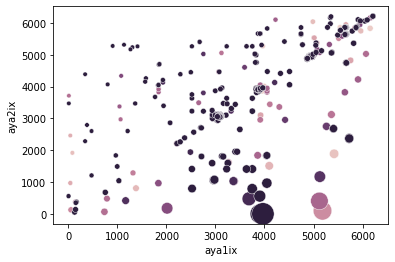

In [411]:
sns.scatterplot(data=df[df.cosine_similarity>=.9], x="aya1ix", y="aya2ix", 
                #alpha=0.5, 
                hue="cosine_similarity", 
                size="ratio",
                sizes=(20, 500),
                legend=False)

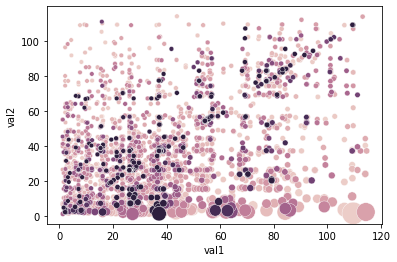

In [412]:
sns.scatterplot(data=df, x="val1", y="val2",  #df[(df.cosine_similarity>=1)&(df.sura1!=df.sura2)]
                #alpha=0.5, 
                hue="cosine_similarity", 
                size="ratio",
                sizes=(20, 500),
                legend=False)

In [413]:
toc = pd.read_csv(path + os.path.sep + 'resources' + os.path.sep + 'toc.csv')#, index_col=0)
df = df[df.cosine_similarity>=threshold].merge(toc.rename(columns={'No.':'sura1'}),on='sura1') \
    .rename(columns={'Name Arabic':'name1_ar',
                     'Name':'name1',
                     'English Meaning':'name1_meaning',
                     'No of verses':'totalayaat1',
                     'Place':'place1',
                     'Chronology':'chron1'}) \
    .merge(toc.rename(columns={'No.':'sura2'}),on='sura2') \
    .rename(columns={'Name Arabic':'name2_ar',
                     'Name':'name2',
                     'English Meaning':'name2_meaning',
                     'No of verses':'totalayaat2',
                     'Place':'place2',
                     'Chronology':'chron2'})
df = df[['aya1ix', 'aya2ix', 'cosine_similarity', 'sura1', 'aya1', 'sura2', 'aya2','textaya1','textaya2',
       'lemmaaya1', 'lemmaaya2', 'name1', 'name2', 'name1_ar', 'name2_ar', 'name1_meaning', 'name2_meaning', 
             'totalayaat1',  'totalayaat2', 'place1', 'place2', 'chron1', 'chron2']]
df.cosine_similarity = df.cosine_similarity.round(3)
df.sort_values(['cosine_similarity','sura1','aya1'],ascending=False) \
    .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_ayaat+'+str(threshold)+'_name_place_chron.csv')

In [414]:
df.sort_values(['sura1','aya1'],ascending=True) \
    .to_csv(path+os.path.sep+'data'+os.path.sep+'cosine_similarity_ayaat+'+str(threshold)+'_name_place_chron.csv')

In [415]:
df[(df.sura1 != df.sura2)&(df.cosine_similarity>=.8)&(df.place1!=df.place2)]

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,sura2,aya2,textaya1,textaya2,lemmaaya1,...,name1_ar,name2_ar,name1_meaning,name2_meaning,totalayaat1,totalayaat2,place1,place2,chron1,chron2
2,3684,476,0.990,35,25,3,184,وَإِن يُكَذِّبُوكَ فَقَدْ كَذَّبَ ٱلَّذِينَ مِ...,فَإِن كَذَّبُوكَ فَقَدْ كُذِّبَ رُسُلٌ مِّن قَ...,<in ka*~aba qad ka*~aba {l~a*iY min qabol jaA^...,...,فاطر,آل عمران,The Originator,The House of Joachim,45,200,Meccan,Medinan,43,89
144,3905,560,1.000,37,118,4,68,وَهَدَيْنَٰهُمَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ,وَلَهَدَيْنَٰهُمْ صِرَٰطًا مُّسْتَقِيمًا,hadaY Sira`T m~usotaqiym,...,الصافات,النساء,Those Ranged in Ranks,Women,182,176,Meccan,Medinan,56,92
145,5,560,1.000,1,6,4,68,ٱهْدِنَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ,وَلَهَدَيْنَٰهُمْ صِرَٰطًا مُّسْتَقِيمًا,hadaY Sira`T m~usotaqiym,...,الفاتحة,النساء,The Opening,Women,7,176,Meccan,Medinan,5,92
154,2658,3494,0.951,22,64,31,26,لَّهُۥ مَا فِى ٱلسَّمَٰوَٰتِ وَمَا فِى ٱلْأَرْ...,لِلَّهِ مَا فِى ٱلسَّمَٰوَٰتِ وَٱلْأَرْضِ إِنّ...,maA fiY samaA^' maA fiY >aroD <in~ {ll~ah ga...,...,الحج,لقمان,The Pilgrimage,Luqman,78,34,Medinan,Meccan,103,57
155,11,3473,1.000,2,5,31,5,أُو۟لَٰٓئِكَ عَلَىٰ هُدًى مِّن رَّبِّهِمْ وَأُ...,أُو۟لَٰٓئِكَ عَلَىٰ هُدًى مِّن رَّبِّهِمْ وَأُ...,>uwla`^}ik EalaY` hudFY min rab~ >uwla`^}ik m...,...,البقرة,لقمان,The Cow,Luqman,286,34,Medinan,Meccan,87,57
166,343,4388,1.000,3,51,43,64,إِنَّ ٱللَّهَ رَبِّى وَرَبُّكُمْ فَٱعْبُدُوهُ ...,إِنَّ ٱللَّهَ هُوَ رَبِّى وَرَبُّكُمْ فَٱعْبُد...,<in~ {ll~ah rab~ rab~ Eabada ha`*aA Sira`T m~u...,...,آل عمران,الزخرف,The House of Joachim,Gold Ornaments,200,89,Medinan,Meccan,89,63
203,2015,179,0.966,16,115,2,173,إِنَّمَا حَرَّمَ عَلَيْكُمُ ٱلْمَيْتَةَ وَٱلدّ...,إِنَّمَا حَرَّمَ عَلَيْكُمُ ٱلْمَيْتَةَ وَٱلدّ...,<in~maA Har~ama EalaY` mayotap dam laHom xinzi...,...,النحل,البقرة,The Bee,The Cow,128,286,Meccan,Medinan,70,87
326,3498,2656,1.000,31,30,22,62,ذَٰلِكَ بِأَنَّ ٱللَّهَ هُوَ ٱلْحَقُّ وَأَنَّ ...,ذَٰلِكَ بِأَنَّ ٱللَّهَ هُوَ ٱلْحَقُّ وَأَنَّ ...,*a`lik >an~ {ll~ah Haq~ >an~ maA daEaA min du...,...,لقمان,الحج,Luqman,The Pilgrimage,34,78,Meccan,Medinan,57,103
811,5493,5619,1.000,73,19,76,29,إِنَّ هَٰذِهِۦ تَذْكِرَةٌ فَمَن شَآءَ ٱتَّخَذ...,إِنَّ هَٰذِهِۦ تَذْكِرَةٌ فَمَن شَآءَ ٱتَّخَذ...,<in~ ha`*aA ta*okirap man $aA^'a {t~axa*a <ila...,...,المزمل,الإنسان,The Enwrapped One,The Human,20,31,Meccan,Medinan,3,98
813,343,2285,1.000,3,51,19,36,إِنَّ ٱللَّهَ رَبِّى وَرَبُّكُمْ فَٱعْبُدُوهُ ...,وَإِنَّ ٱللَّهَ رَبِّى وَرَبُّكُمْ فَٱعْبُدُوه...,<in~ {ll~ah rab~ rab~ Eabada ha`*aA Sira`T m~u...,...,آل عمران,مريم,The House of Joachim,Mary,200,98,Medinan,Meccan,89,44


In [416]:
ayaat_subset = set(df.aya1ix.unique()) | set(df.aya2ix.unique())
ayaat_subset = sorted(list(ayaat_subset))

In [417]:
tchm = testcos.loc[ayaat_subset,ayaat_subset]

In [418]:
tchm

,1,5,11,53,128,140,147,153,168,179,...,6094,6095,6103,6157,6158,6163,6199,6209,6210,6211
1,1.000000,0.0,0.073835,0.189898,0.189898,0.000000,0.000000,0.088978,0.000000,0.039344,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
11,0.073835,0.0,1.000000,0.060617,0.060617,0.000000,0.000000,0.115870,0.000000,0.037271,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.040044,0.000000,0.000000,0.000000
53,0.189898,0.0,0.060617,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.057390,...,0.0,0.0,0.02798,0.0,0.000000,0.0,0.061660,0.000000,0.000000,0.000000
128,0.189898,0.0,0.060617,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.057390,...,0.0,0.0,0.02798,0.0,0.000000,0.0,0.061660,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037022,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
6199,0.000000,0.0,0.040044,0.061660,0.061660,0.027544,0.027544,0.045851,0.072016,0.073935,...,0.0,0.0,0.00000,0.0,0.000000,0.0,1.000000,0.053876,0.053876,0.053876
6209,0.000000,0.0,0.000000,0.000000,0.000000,0.101081,0.101081,0.063827,0.100250,0.070658,...,0.0,0.0,0.00000,0.0,0.070278,0.0,0.053876,1.000000,1.000000,1.000000
6210,0.000000,0.0,0.000000,0.000000,0.000000,0.101081,0.101081,0.063827,0.100250,0.070658,...,0.0,0.0,0.00000,0.0,0.070278,0.0,0.053876,1.000000,1.000000,1.000000


testcos.mask(testcos>0.5,1,inplace=True)
testcos.mask(testcos<=0.5,0,inplace=True)

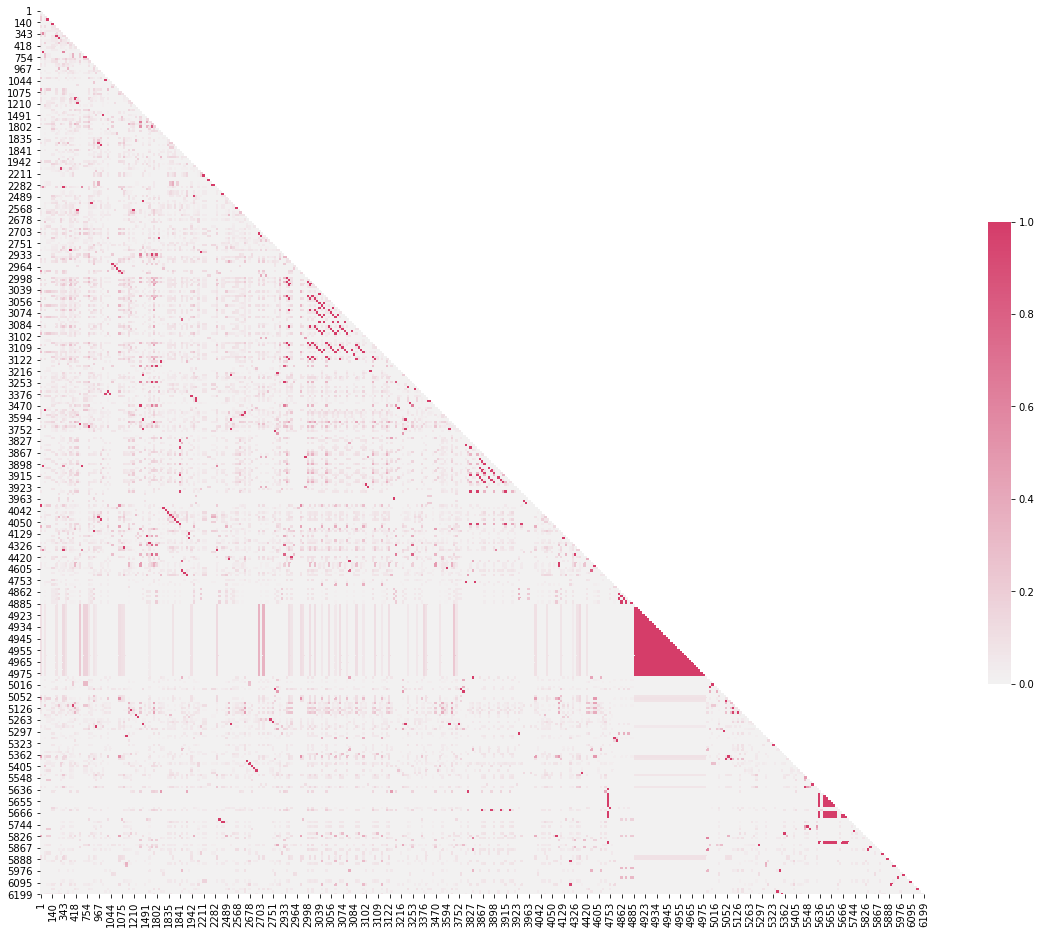

In [419]:
import seaborn as sns 
mask = np.triu(np.ones_like(tchm, dtype=bool))
f, ax = plt.subplots(figsize=(20, 17))
cmap = sns.diverging_palette(359, 0, as_cmap=True)

sns.heatmap(tchm, mask=mask, cmap=cmap, vmax=1, center=0,
    square=True, cbar_kws={"shrink": .5})


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aya1ix             847 non-null    int64  
 1   aya2ix             847 non-null    int64  
 2   cosine_similarity  847 non-null    float64
 3   sura1              847 non-null    int64  
 4   aya1               847 non-null    int64  
 5   sura2              847 non-null    int64  
 6   aya2               847 non-null    int64  
 7   textaya1           847 non-null    object 
 8   textaya2           847 non-null    object 
 9   lemmaaya1          847 non-null    object 
 10  lemmaaya2          847 non-null    object 
 11  name1              847 non-null    object 
 12  name2              847 non-null    object 
 13  name1_ar           847 non-null    object 
 14  name2_ar           847 non-null    object 
 15  name1_meaning      847 non-null    object 
 16  name2_meaning      847 non

In [421]:
df[(df['sura1']==84)&(df['sura2']==95)]

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,sura2,aya2,textaya1,textaya2,lemmaaya1,...,name1_ar,name2_ar,name1_meaning,name2_meaning,totalayaat1,totalayaat2,place1,place2,chron1,chron2
161,5908,6103,1.0,84,25,95,6,إِلَّا ٱلَّذِينَ ءَامَنُوا۟ وَعَمِلُوا۟ ٱلصَّٰ...,إِلَّا ٱلَّذِينَ ءَامَنُوا۟ وَعَمِلُوا۟ ٱلصَّٰ...,<il~aA {l~a*iY 'aAmana Eamila S~a`liHa`t >ajo...,...,الإنشقاق,التين,The Bursting Open,The Fig,25,8,Meccan,Meccan,83,28


In [422]:
import networkx as nx

In [423]:
nxdf = df.groupby(['sura1','sura2']).agg('mean').drop(['aya1ix','aya2ix'],1)\
    .sort_values('cosine_similarity',ascending=False).reset_index()
G = nx.from_pandas_edgelist(df, 'sura1','sura2',
                            edge_attr=True, create_using=nx.MultiGraph())

/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [424]:
toc.index += 1
feats = toc.rename(columns={'No of verses':'totalayaat',
                            'Chronology':'chron',
                            'Name Arabic':'name_ar',
                            'English Meaning':'name_meaning',
                            'Name':'name',
                            'Place':'place'
                           })\
            .T.to_dict()
toc.index -= 1

In [425]:
nx.set_node_attributes(G, feats)
G.nodes(data=True)

NodeDataView({58: {'No.': 58, 'name_ar': 'المجادلة', 'name': 'Al-Mujadila', 'name_meaning': 'She who Disputes', 'totalayaat': 22, 'place': 'Medinan', 'chron': 105}, 3: {'No.': 3, 'name_ar': 'آل عمران', 'name': 'Al Imran', 'name_meaning': 'The House of Joachim', 'totalayaat': 200, 'place': 'Medinan', 'chron': 89}, 8: {'No.': 8, 'name_ar': 'الأنفال', 'name': 'Al-Anfal', 'name_meaning': 'Spoils of War', 'totalayaat': 75, 'place': 'Medinan', 'chron': 88}, 35: {'No.': 35, 'name_ar': 'فاطر', 'name': 'Fatir', 'name_meaning': 'The Originator', 'totalayaat': 45, 'place': 'Meccan', 'chron': 43}, 2: {'No.': 2, 'name_ar': 'البقرة', 'name': 'Al-Baqara', 'name_meaning': 'The Cow', 'totalayaat': 286, 'place': 'Medinan', 'chron': 87}, 15: {'No.': 15, 'name_ar': 'الحجر', 'name': 'Al-Hijr', 'name_meaning': 'The City of Stoneor The Rocky Plain', 'totalayaat': 99, 'place': 'Meccan', 'chron': 54}, 37: {'No.': 37, 'name_ar': 'الصافات', 'name': 'As-Saffat', 'name_meaning': 'Those Ranged in Ranks', 'totalayaa

In [426]:
G.edges(data=True)

MultiEdgeDataView([(58, 3, {'aya1ix': 5120, 'aya2ix': 408, 'cosine_similarity': 0.951, 'aya1': 17, 'aya2': 116, 'textaya1': 'لَّن تُغْنِىَ عَنْهُمْ أَمْوَٰلُهُمْ وَلَآ أَوْلَٰدُهُم مِّنَ ٱللَّهِ شَيْـًٔا أُو۟لَٰٓئِكَ أَصْحَٰبُ ٱلنَّارِ هُمْ فِيهَا خَٰلِدُونَ', 'textaya2': 'إِنَّ ٱلَّذِينَ كَفَرُوا۟ لَن تُغْنِىَ عَنْهُمْ أَمْوَٰلُهُمْ وَلَآ أَوْلَٰدُهُم مِّنَ ٱللَّهِ شَيْـًٔا وَأُو۟لَٰٓئِكَ أَصْحَٰبُ ٱلنَّارِ هُمْ فِيهَا خَٰلِدُونَ', 'lemmaaya1': "lan >agonato Ean maAl laA walad min {ll~ah $aYo' >uwla`^}ik >aSoHa`b naAr  fiY xa`lid", 'lemmaaya2': "<in~ {l~a*iY kafara lan >agonato Ean maAl laA walad min {ll~ah $aYo' >uwla`^}ik >aSoHa`b naAr  fiY xa`lid", 'name1': 'Al-Mujadila', 'name2': 'Al Imran', 'name1_ar': 'المجادلة', 'name2_ar': 'آل عمران', 'name1_meaning': 'She who Disputes', 'name2_meaning': 'The House of Joachim', 'totalayaat1': 22, 'totalayaat2': 200, 'place1': 'Medinan', 'place2': 'Medinan', 'chron1': 105, 'chron2': 89}), (3, 8, {'aya1ix': 1169, 'aya2ix': 418, 'cosine_similarit

/Users/ali.khan/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


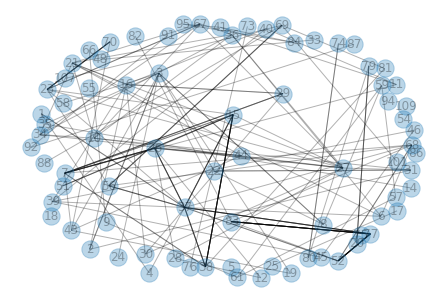

In [427]:
pos = nx.spring_layout(G, k=2, weight='cosine_similarity')
nx.draw(G, pos=pos, with_labels=True, alpha=0.3)

In [428]:
G.number_of_nodes()

79

In [429]:
G.number_of_edges()

847

In [430]:
nx.degree(G)

MultiDegreeView({58: 1, 3: 10, 8: 4, 35: 2, 2: 8, 15: 20, 37: 81, 38: 15, 77: 116, 23: 15, 26: 199, 7: 17, 29: 6, 51: 3, 27: 11, 81: 2, 52: 16, 56: 14, 69: 9, 4: 2, 1: 3, 68: 7, 6: 4, 22: 4, 31: 5, 10: 6, 84: 4, 41: 3, 11: 3, 95: 2, 16: 7, 43: 5, 19: 4, 30: 3, 21: 10, 67: 7, 70: 6, 101: 3, 83: 17, 88: 1, 107: 1, 75: 2, 39: 5, 40: 3, 46: 2, 59: 3, 57: 2, 61: 3, 9: 2, 86: 2, 33: 1, 48: 1, 44: 4, 28: 5, 36: 6, 12: 2, 34: 5, 55: 930, 73: 1, 76: 1, 24: 1, 18: 4, 66: 1, 54: 18, 80: 3, 79: 4, 91: 1, 92: 2, 87: 1, 82: 1, 94: 2, 14: 1, 74: 2, 20: 5, 109: 6, 45: 2, 17: 1, 25: 1, 5: 2})

In [431]:
from bokeh.io import output_notebook, show#, save
output_notebook()
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure, output_file, save
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

Loading BokehJS ...

In [432]:
#number_to_adjust_by = 5
#adjusted_node_size = dict([(node, degree/20+number_to_adjust_by) for node, degree in nx.degree(G)])
adjusted_node_size = dict([(node, math.log(degree+1)*7) for node, degree in nx.degree(G)])
adjusted_color = dict([(node, 1 if place == 'Meccan' else 0.95) for node, place in nx.get_node_attributes(G, name='place').items()])
adjusted_color = dict([(node, totalayaat) for node, totalayaat in nx.get_node_attributes(G, name='totalayaat').items()])

nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)
nx.set_node_attributes(G, name='adjusted_color', values=adjusted_color)
nx.set_node_attributes(G, name='degree', values=dict([(node, degree) for node, degree in nx.degree(G)]))

In [433]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_color'#degree

#Color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

title = 'Similarity ({}%) - Each node is a Surah, size: degree (# connections with other nodes), colour: # of ayaat in Surah'.format(threshold*100)

HOVER_TOOLTIPS = [
       ("Sura", "@index"),
        ("Chronology", "@chron"),
       ("Name", "@name"),
       ("Name Arb", "@name_ar"),
       ("Name Eng", "@name_meaning"),
       ("Total Verses", "@totalayaat"),
        ("Place", "@place"),
        ("Degree", "@degree")
]

output_file(filename="aya_similarity_{}_bokeh_interactive.html".format(threshold), 
            title="Surahs with {}% Similar (Lemmatized) Ayaat".format(threshold))

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS, plot_width=900,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title, name='Opacity 0.5')

plot.background_fill_color = "black"
plot.background_fill_alpha = 0.9
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None
plot.xaxis.major_label_text_color = None 
plot.yaxis.major_label_text_color = None 

#Create a network graph object
network_graph = from_networkx(G, pos, scale=15)#, center=(0, 0))
network_graph = from_networkx(G, nx.spring_layout, weight='cosine_similarity',scale=5, center=(0, 0))
network_graph = from_networkx(G, nx.drawing.layout.kamada_kawai_layout(G, weight='cosine_similarity', scale=10))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1, line_color='gold')

plot.renderers.append(network_graph)

show(plot)

save(plot)#, filename=f"{title}.html")

'/Users/ali.khan/Documents/src/qcm-analysis/aya_similarity_0.95_bokeh_interactive.html'

In [338]:
df[['place1','place2']].value_counts()

place1   place2 
Meccan   Meccan     307
Medinan  Medinan     10
Meccan   Medinan      3
Medinan  Meccan       2
dtype: int64

In [308]:
df[(df['sura2']==39)&(df['sura1']==46)]

,aya1ix,aya2ix,cosine_similarity,sura1,aya1,sura2,aya2,textaya1,textaya2,lemmaaya1,...,name1_ar,name2_ar,name1_meaning,name2_meaning,totalayaat1,totalayaat2,place1,place2,chron1,chron2
314,4511,4058,1.0,46,2,39,1,تَنزِيلُ ٱلْكِتَٰبِ مِنَ ٱللَّهِ ٱلْعَزِيزِ ٱل...,تَنزِيلُ ٱلْكِتَٰبِ مِنَ ٱللَّهِ ٱلْعَزِيزِ ٱل...,tanziyl kita`b min {ll~ah Eaziyz Hakiym,...,الأحقاف,الزمر,The Sand Dunes,The Crowds,35,75,Meccan,Meccan,66,59
